# Двухфакторный дисперсионный анализ
ANOVA - ANalysis Of VAriance

In [13]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../resources/birds.csv")

In [3]:
df.head()

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1


In [12]:
df.groupby(['hormone', 'sex']).describe()

var4                                                        \
            count       mean       std        min        25%        50%   
hormone sex                                                               
0       0    16.0  19.887291  3.677211  13.947889  17.474799  19.244836   
        1    16.0  17.608916  2.449753  13.140259  15.333087  17.929291   
1       0    16.0  17.292254  2.864428  12.452679  14.917269  17.415496   
        1    16.0  19.743662  3.383574  14.574463  17.799358  19.691275   

                                   
                   75%        max  
hormone sex                        
0       0    21.026331  28.619523  
        1    19.517146  20.688260  
1       0    18.750598  22.300875  
        1    21.875595  25.152882

In [5]:
df.groupby("hormone")["var4"].mean()

hormone
0    18.748103
1    18.517958
Name: var4, dtype: float64

In [6]:
df.pivot_table(values=["var4"],
               index=["hormone", "sex"],
               aggfunc="mean")

var4
hormone sex           
0       0    19.887291
        1    17.608916
1       0    17.292254
        1    19.743662

Два варианта написания кода

In [9]:
formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


In [10]:
formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


Дисперсионный анализ с библиотекой pingouin

          Source          SS  DF         MS         F     p-unc       np2
0        hormone    0.847472   1   0.847472  0.086528  0.769653  0.001440
1            sex    0.119762   1   0.119762  0.012228  0.912318  0.000204
2  hormone * sex   89.483384   1  89.483384  9.136390  0.003682  0.132150
3       Residual  587.650394  60   9.794173       NaN       NaN       NaN


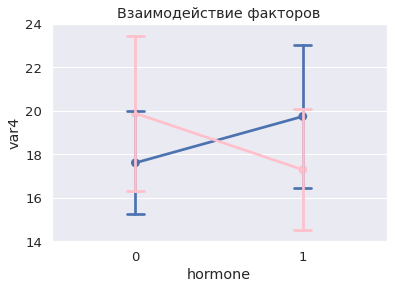

In [22]:
aov = pg.anova(dv='var4', between=['hormone', 'sex'], data=df, detailed=True)
print(aov)

sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=df[df['sex']==1], x='hormone', y='var4', capsize=.1, ci='sd')
plt.ylim(14, 24)
_ = plt.title('Взаимодействие факторов')
sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=df[df['sex']==0], x='hormone', y='var4', capsize=.1, ci='sd', color='pink')
plt.ylim(14, 24)
_ = plt.title('Взаимодействие факторов')

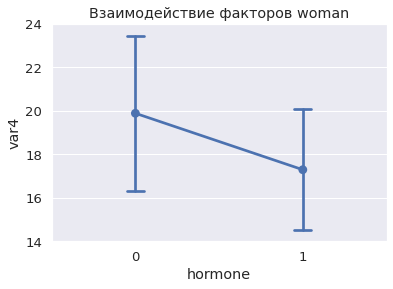

In [17]:
sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=df[df['sex']==0], x='hormone', y='var4', capsize=.1, ci='sd')
plt.ylim(14, 24)
_ = plt.title('Взаимодействие факторов woman')